In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')

In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [5]:
df.tail(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.308,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [6]:
df.count()

Sex               4177
Length            4177
Diameter          4177
Height            4177
Whole weight      4177
Shucked weight    4177
Viscera weight    4177
Shell weight      4177
Rings             4177
dtype: int64

In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<Axes: >

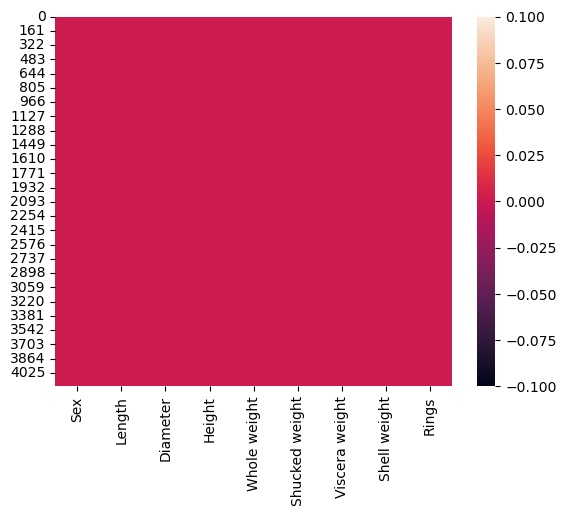

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4172    False
4173    False
4174    False
4175    False
4176    False
Length: 4177, dtype: bool

In [10]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [12]:
dfnew=pd.DataFrame(data=df)

In [13]:
dfnew

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [14]:
dfnew.shape

(4177, 9)

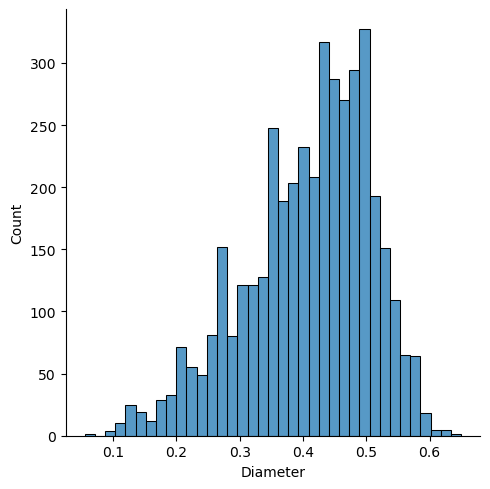

In [15]:
sns.displot(dfnew['Diameter'])

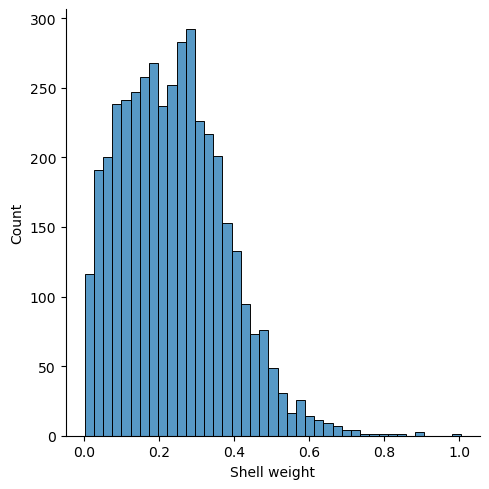

In [16]:
sns.displot(dfnew['Shell weight'])

In [17]:
dfnew.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [18]:
dfnew.iloc[:,0] # Applying index location to get the first column

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [19]:
# LabeLEncoder to transform the strings to integer in the sex column
labcode=LabelEncoder()
dfnew['Sex']=labcode.fit_transform(dfnew['Sex'])
dfnew

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


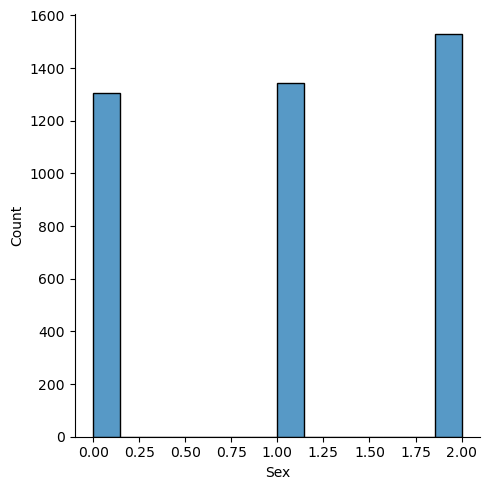

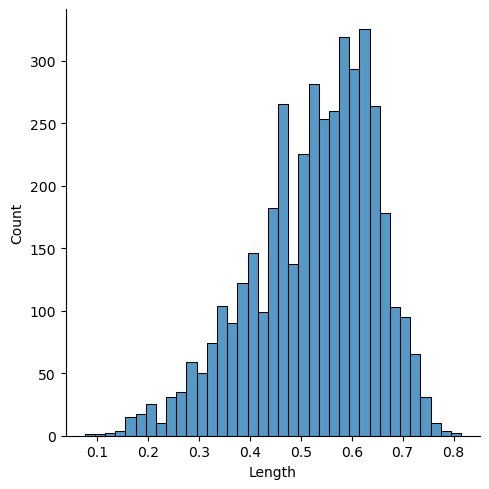

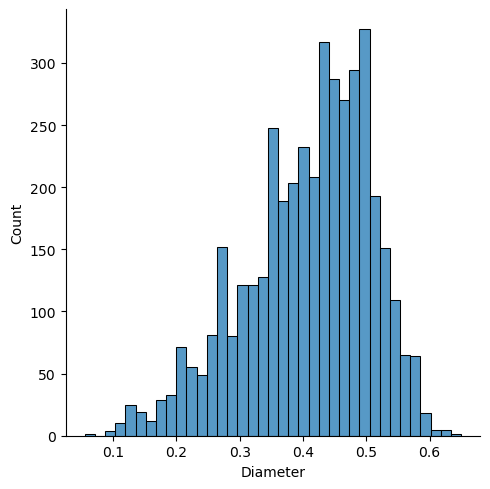

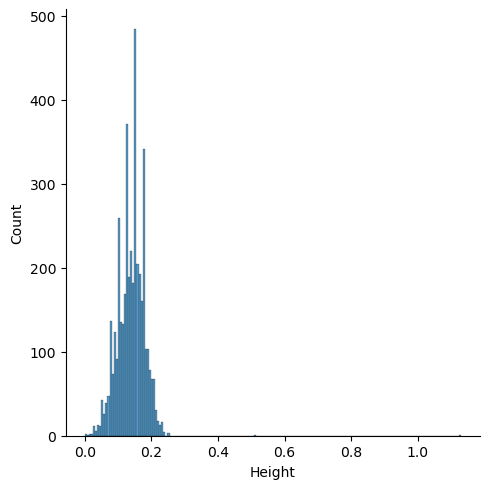

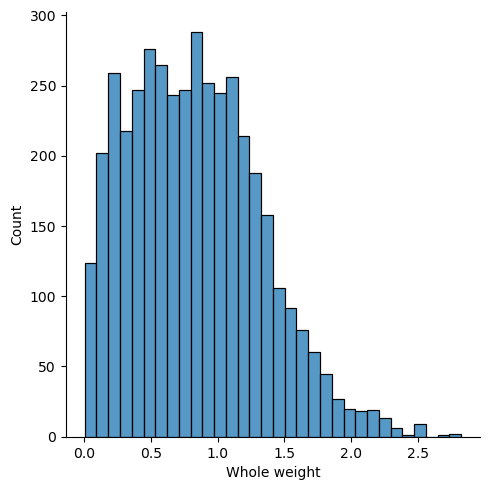

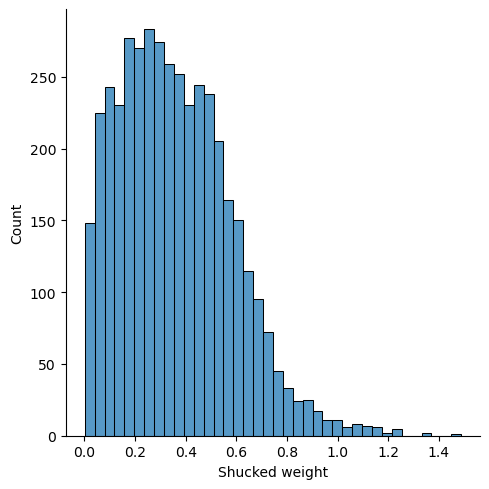

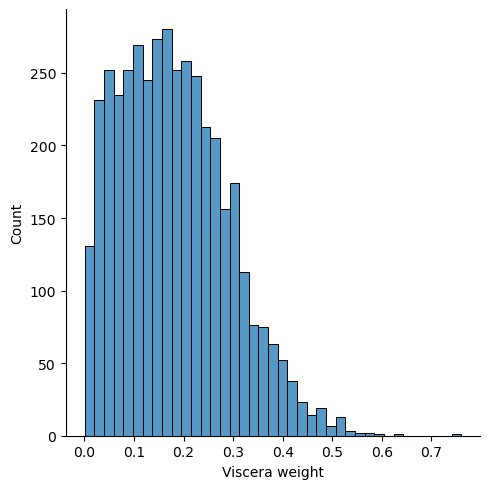

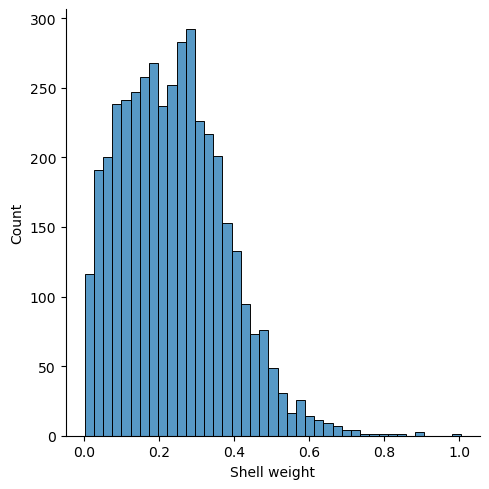

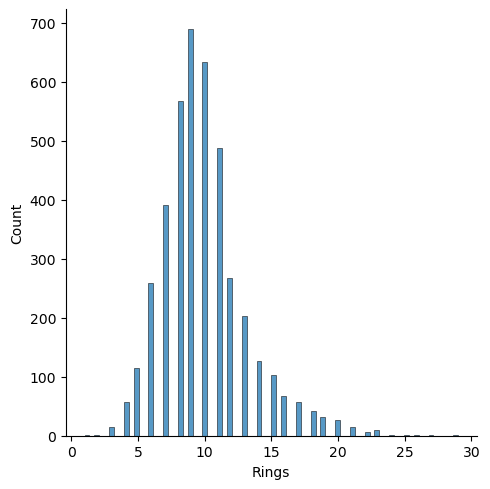

In [20]:
for i in dfnew.columns:
    sns.displot(dfnew[i]) # Using a for loop to plot the distribution plot for the data

<Axes: xlabel='Rings', ylabel='Count'>

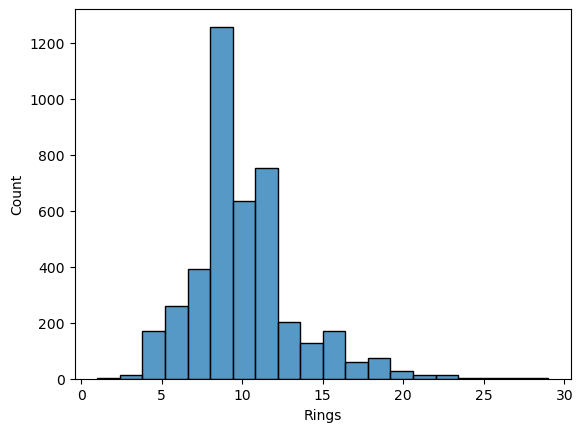

In [21]:
sns.histplot(dfnew['Rings'],bins=20) # Plotting the Histogram of Rings

<Axes: xlabel='Whole weight', ylabel='Density'>

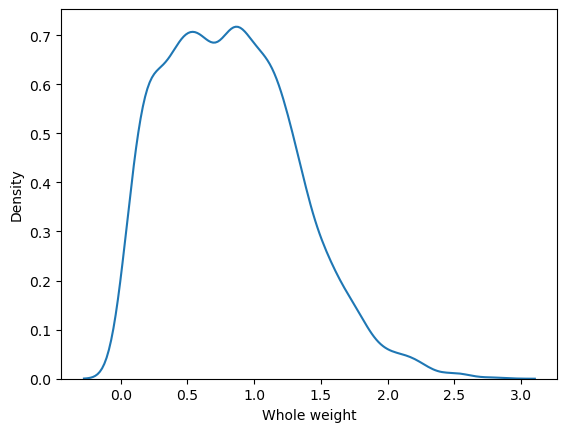

In [22]:
sns.kdeplot(df['Whole weight']) # plot the Kernel Density Estimate Curve

<Axes: xlabel='Shell weight', ylabel='Height'>

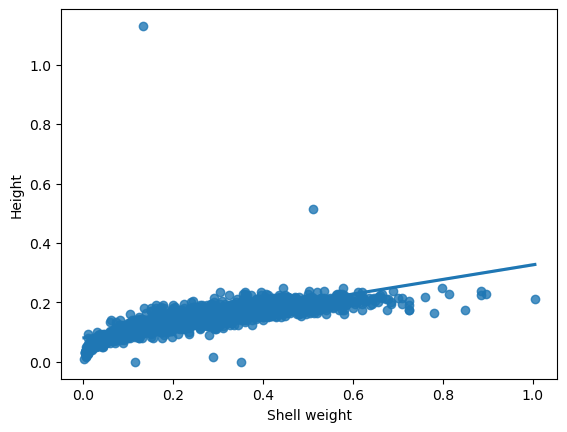

In [23]:
sns.regplot(x='Shell weight',y='Height',data=df) # plotting the regression plot for shell weight and Height

<Axes: xlabel='Rings', ylabel='Diameter'>

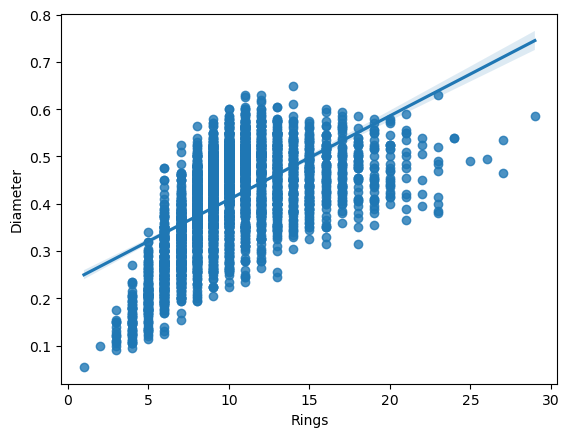

In [24]:
sns.regplot(x='Rings',y='Diameter',data=df)

In [25]:
dfnew.skew() # Looking out for skewness 

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [26]:
dfnew['Height']=np.sqrt(dfnew['Height'])
dfnew.skew() # removing the skewness

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

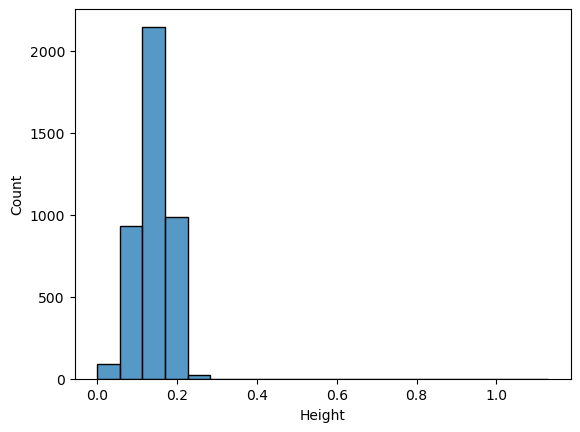

In [27]:
sns.histplot(df['Height'],bins=20)

In [28]:
# detecting Outliers
from scipy.stats import zscore
dfnewzscore=np.abs(zscore(dfnew))
print(np.where(dfnewzscore>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        237,  238,  238,  238,  239,  239,  270,  275,  277,  278,  294,
        306,  310,  313,  314,  334,  351,  355,  358,  358,  362,  375,
        416,  417,  428,  431,  433,  469,  478,  480,  501,  526,  526,
        530,  572,  628,  673,  674,  675,  678,  694,  694,  696,  696,
        718,  719,  719,  719,  720,  720,  720,  744,  754,  756,  811,
        891,  891,  891, 1048, 1051, 1051, 1052, 1174, 1193, 1197, 1199,
       1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257,
       1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429,
       1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762, 1763,
       1763, 1763, 1821, 1982, 1986, 1987, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2114, 2157, 2161, 2169, 2171, 2172, 2176, 2180,
       2199, 2201, 2208, 2209, 2274, 2275, 2305, 2

In [29]:
dfnew.shape

(4177, 9)

In [30]:
df1=dfnew[(dfnewzscore>3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)
df1=dfnew

dfnew.shape= (4177, 9)


In [31]:
df1.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.040410,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.883322,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.888117,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.040410,0.883322,0.888117,1.000000,0.843708,0.797910,0.822861,0.841225,0.592653
Whole weight,-0.021391,0.925261,0.925452,0.843708,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.797910,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.822861,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.841225,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.592653,0.540390,0.420884,0.503819,0.627574,1.000000


<Axes: >

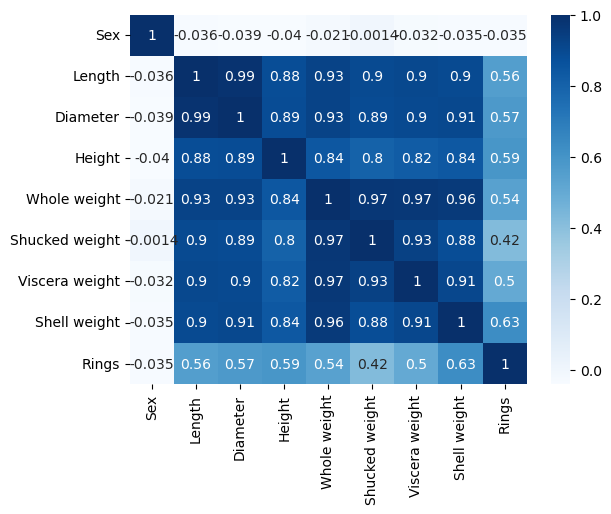

In [32]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
x=dfnew.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960


In [35]:
x.shape

(4177, 8)

In [36]:
y=dfnew.iloc[:,-1]

In [37]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [38]:
y.shape

(4177,)

In [39]:
def vif_cal():
    vif=pd.DataFrame()
    vif['Vif Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)
vif_cal()

   Vif Factor        features
0    2.601651             Sex
1  780.823832          Length
2  752.536035        Diameter
3  122.141684          Height
4  421.668789    Whole weight
5  103.252271  Shucked weight
6   63.683020  Viscera weight
7   81.395561    Shell weight


In [40]:
scale=StandardScaler()
xn=scale.fit_transform(x)

In [41]:
xn

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [42]:
xn.shape

(4177, 8)

In [43]:
y.shape

(4177,)

In [44]:
xn_train,xn_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=55)

In [46]:
xn_train.shape

(2923, 8)

In [47]:
xn_test.shape

(1254, 8)

In [48]:
y_train.shape

(2923,)

In [50]:
y_test.shape

(1254,)

In [53]:
lr=LinearRegression()
lr.fit(xn_train,y_train)
lr.coef_

array([  0.07972173,  -2.8557118 ,  12.47912384,  12.86348949,
        10.77975108, -21.7355327 , -11.18955827,   6.88426475])

In [54]:
features=['Sex','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
list(zip(lr.coef_,features))

[(0.07972172956707255, 'Sex'),
 (-2.855711799103099, 'Diameter'),
 (12.479123844312607, 'Height'),
 (12.863489493080378, 'Whole weight'),
 (10.779751083049646, 'Shucked weight'),
 (-21.735532699608413, 'Viscera weight'),
 (-11.189558265389733, 'Shell weight')]

In [56]:
lr.intercept_

0.7588326496807127

In [58]:
lr.score(xn_train,y_train)

0.543137457030369

In [59]:
pred=lr.predict(xn_test)
print('predicted Values',pred)

predicted Values [ 9.39714583  8.53993987  8.38654073 ...  7.90516608  9.18579538
 12.66866192]


In [60]:
preddf=pd.DataFrame(data=pred)

In [61]:
preddf

,0
0,9.397146
1,8.539940
2,8.386541
3,11.031906
4,10.758982
...,...
1249,10.818291
1250,8.965195
1251,7.905166
1252,9.185795


In [62]:
lr.score(xn_test,y_test)

0.5098644683539036

In [63]:
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:', mean_squared_error(y_test,pred))
print('Root Mean Square:', np.sqrt(mean_squared_error(y_test,pred)))

Mean Absolute Error: 1.6175846997407768
Mean Squared Error: 5.130994177934539
Root Mean Square: 2.265169790089595


In [64]:
print('R2 Score:',r2_score(y_test,pred))

R2 Score: 0.5098644683539036


In [65]:
# Carrying regularixation of the dataset
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score

In [66]:
rdg=Ridge(alpha=.0001,random_state=45)
rdg.fit(xn_train,y_train)

Ridge(alpha=0.0001, random_state=45)

In [67]:
rdg.score(xn_train,y_train)

0.5431374568500245

In [68]:
rdg.coef_

array([  0.07971973,  -2.85427443,  12.47729914,  12.86310358,
        10.77919673, -21.73496347, -11.18875178,   6.88493212])

In [69]:
predrdg=rdg.predict(xn_test)
predrdg

array([ 9.39709978,  8.53992743,  8.38656634, ...,  7.90515417,
        9.18576662, 12.66864001])

In [70]:
r2_score(y_test,predrdg)

0.5098658214316616

In [72]:
# Using Lasso Regressor
lass=Lasso(alpha=.0001,random_state=47)
lass.fit(xn_train,y_train)

Lasso(alpha=0.0001, random_state=47)

In [73]:
lass.score(xn_train,y_train)

0.5431226730730949

In [74]:
predlass=lass.predict(xn_test)
predlass

array([ 9.38029187,  8.53542222,  8.39550607, ...,  7.90061961,
        9.17698225, 12.66379463])

In [75]:
r2_score(y_test,predlass)

0.5100347654962536

In [77]:
#Using ElasticNet Regressor
Elas=ElasticNet(alpha=0.0001,random_state=45)
Elas.fit(xn_train,y_train)


ElasticNet(alpha=0.0001, random_state=45)

In [78]:
Elas.score(xn_train,y_train)

0.5428093776811812

In [79]:
predelas=Elas.predict(xn_test)

In [80]:
predelas

array([ 9.33921389,  8.52607647,  8.41905541, ...,  7.89185938,
        9.15005568, 12.63286151])

In [81]:
r2_score(y_test,predelas)

0.5113750529648462

# APPROACHING MORE REGRESSORS

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [84]:
# Using DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='squared_error')
dtr.fit(xn_train,y_train)

DecisionTreeRegressor()

In [85]:
print('dtc Score:',dtr.score(xn_train,y_train))

dtc Score: 1.0


In [86]:
dtrpred=dtr.predict(xn_test)

In [91]:
print('r2_Score of dtc:', r2_score(y_test,dtrpred))

r2_Score of dtc: 0.1039438480949696


In [92]:
print('Mean Squared Error of dtc:',mean_squared_error(y_test,dtrpred))

Mean Squared Error of dtc: 9.380382775119617


In [93]:
print('Root Mean Squared of dtc:',np.sqrt(mean_squared_error(y_test,dtrpred)))

Root Mean Squared of dtc: 3.0627410558386448


In [95]:
# Using KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(xn_train,y_train)

KNeighborsRegressor()

In [96]:
print('Knr Score:',knr.score(xn_train,y_train))

Knr Score: 0.6773411119721605


In [97]:
knrpred=knr.predict(xn_test)

In [99]:
print('r2score of knr:',r2_score(y_test,knrpred))

r2score of knr: 0.5073313709454372


In [100]:
print('mean square error of knr:', mean_squared_error(y_test,knrpred))

mean square error of knr: 5.157511961722489


In [101]:
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,knrpred)))

Root Mean Square Error: 2.271015623399031


In [102]:
# Using Support Vector Regressor
svr=SVR()
svr.fit(xn_train,y_train)

SVR()

In [104]:
print('SVR Score:',svr.score(xn_train,y_train))

SVR Score: 0.49369030881001386


In [105]:
svrpred=svr.predict(xn_test)

In [106]:
print('R_2 Score for SVR is:',r2_score(y_test,svrpred))

R_2 Score for SVR is: 0.48219421412772756


In [107]:
print('mean square error for svr is:',mean_squared_error(y_test,svrpred))

mean square error for svr is: 5.420660819444203


In [108]:
print('Root Mean Squared Error for SVR is:',np.sqrt(mean_squared_error(y_test,svrpred)))

Root Mean Squared Error for SVR is: 2.3282312641669005


In [109]:
# Using the Stochastical Gradient Regressor
from sklearn.linear_model import SGDRegressor

In [110]:
sgd=SGDRegressor()

In [111]:
sgd.fit(xn_train,y_train)

SGDRegressor()

In [112]:
print('The SGD Score is:',sgd.score(xn_train,y_train))

The SGD Score is: 0.5145069197780301


In [113]:
sgdpred=sgd.predict(xn_test)

In [114]:
print('The R2_Score of SGD is:',r2_score(y_test,sgdpred))

The R2_Score of SGD is: 0.4972582433119047


In [115]:
print('The Mean Square Error of SGD is:',mean_squared_error(y_test,sgdpred))

The Mean Square Error of SGD is: 5.26296271137058


In [116]:
print('The Root Square Error of SGD is:',np.sqrt(mean_squared_error(y_test,sgdpred)))

The Root Square Error of SGD is: 2.2941147990827706


In [117]:
# Using the Ensemble Methods
from sklearn.ensemble import RandomForestRegressor

In [118]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [119]:
rf.fit(xn_test,y_test)

RandomForestRegressor(random_state=42)

In [120]:
print('The Random Forest Regressor Score:',rf.score(xn_train,y_train))

The Random Forest Regressor Score: 0.508018993858063


In [121]:
rfpred=rf.predict(xn_test)

In [122]:
print('Mean Square Error for RFR is:',mean_squared_error(y_test,rfpred))

Mean Square Error for RFR is: 0.7114912280701755


In [123]:
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,rfpred)))

Root Mean Square Error: 0.8434993942322516


In [124]:
# Using AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

In [125]:
ada=AdaBoostRegressor(n_estimators=50,random_state=45)
ada.fit(xn_train,y_train)

AdaBoostRegressor(random_state=45)

In [127]:
print('The AdaBoost Regressor Score is:',ada.score(xn_train,y_train))

The AdaBoost Regressor Score is: 0.2500705969348834


In [128]:
adapred=ada.predict(xn_test)

In [130]:
print('Mean Square Error of AdaBoost:',mean_squared_error(y_test,adapred))

Mean Square Error: 8.555074230284314


In [131]:
print('Root Mean Square Error of AdaBoost:',np.sqrt(mean_squared_error(y_test,adapred)))

Root Mean Square Error of AdaBoost: 2.9249058498153944


In [133]:
print('R2_score of AdaBoost:',r2_score(y_test,adapred))

R2_score of AdaBoost: 0.18278101461028085


In [134]:
# Using GradientBoosing Regressors
from sklearn.ensemble import GradientBoostingRegressor

In [135]:
gbr=GradientBoostingRegressor()

In [136]:
gbr.fit(xn_train,y_train)

GradientBoostingRegressor()

In [137]:
print('Gradient Boosting Regressor Score is',gbr.score(xn_train,y_train))

Gradient Boosting Regressor Score is 0.6751912143511724


In [138]:
gbrpred=gbr.predict(xn_test)

In [139]:
print('The Mean Squared Error is:',mean_squared_error(y_test,gbrpred))

The Mean Squared Error is: 4.799105784190086


In [140]:
print('The Root Mean Squared Error is:',np.sqrt(mean_squared_error(y_test,gbrpred)))

The Root Mean Squared Error is: 2.190686144610881
